In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
from pandas.api.types import CategoricalDtype

In [52]:
data = pd.read_excel("data_reduce_filled.xlsx")

In [53]:
category_values = ['H', 'UM', 'LM', 'L']

category_order = CategoricalDtype(category_values, ordered=True)

data.loc[:,'Income Group'] = data.loc[:,'Income Group'].astype(category_order)

In [54]:
data['Income Group'].unique()

['L', 'UM', 'LM', 'H']
Categories (4, object): ['H' < 'UM' < 'LM' < 'L']

In [55]:
# Polllution variables

pollution = [
    'Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS]',
    'Access to clean fuels and technologies for cooking, rural (% of rural population) [EG.CFT.ACCS.RU.ZS]',
    'Access to clean fuels and technologies for cooking, urban (% of urban population) [EG.CFT.ACCS.UR.ZS]',

    'Access to electricity (% of population) [EG.ELC.ACCS.ZS]',
    'Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]',
    'Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]',

    'Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]',

    'Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE]',

    'CO2 emissions (kg per 2017 PPP $ of GDP) [EN.ATM.CO2E.PP.GD.KD]',

    'Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE]',
    'Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE]',

    'Methane emissions (kt of CO2 equivalent) [EN.ATM.METH.KT.CE]',
    'Nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.KT.CE]',

    'Energy intensity level of primary energy (MJ/$2017 PPP GDP) [EG.EGY.PRIM.PP.KD]',
    'Carbon intensity of electricity (gCO2/kWh)'
]

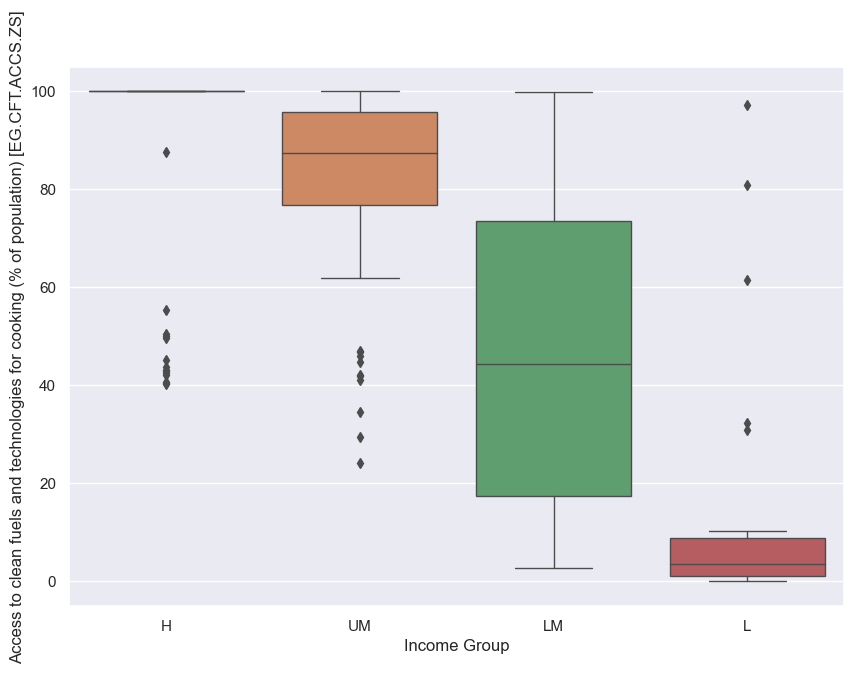

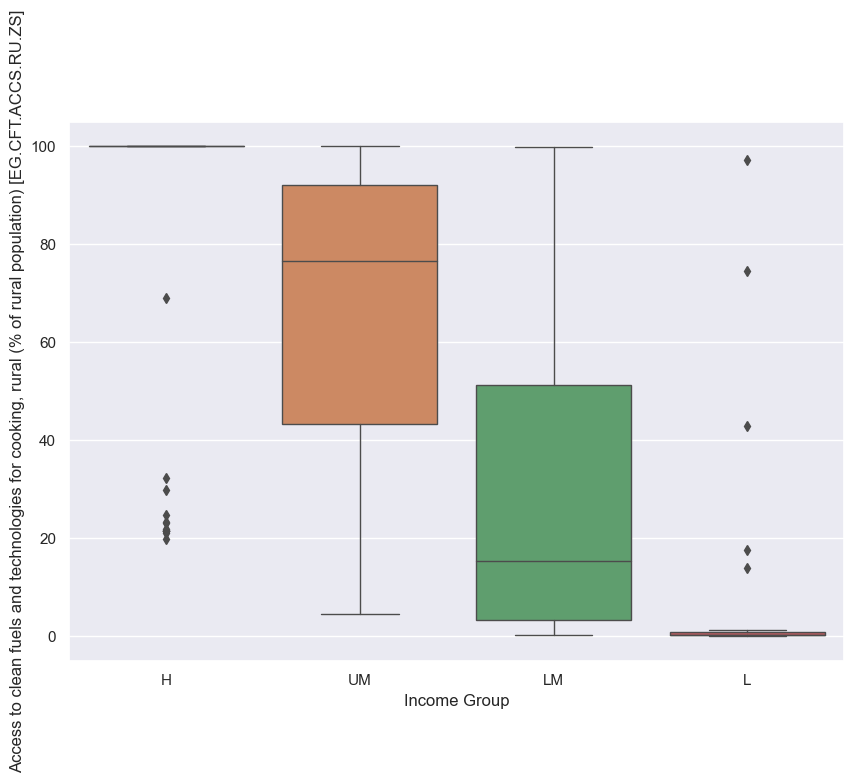

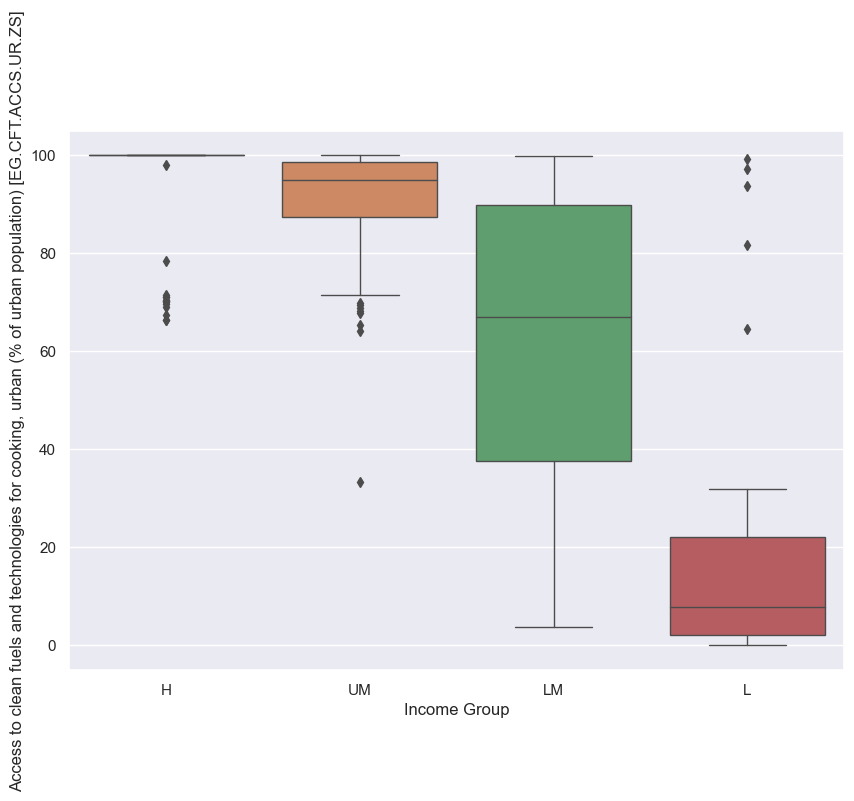

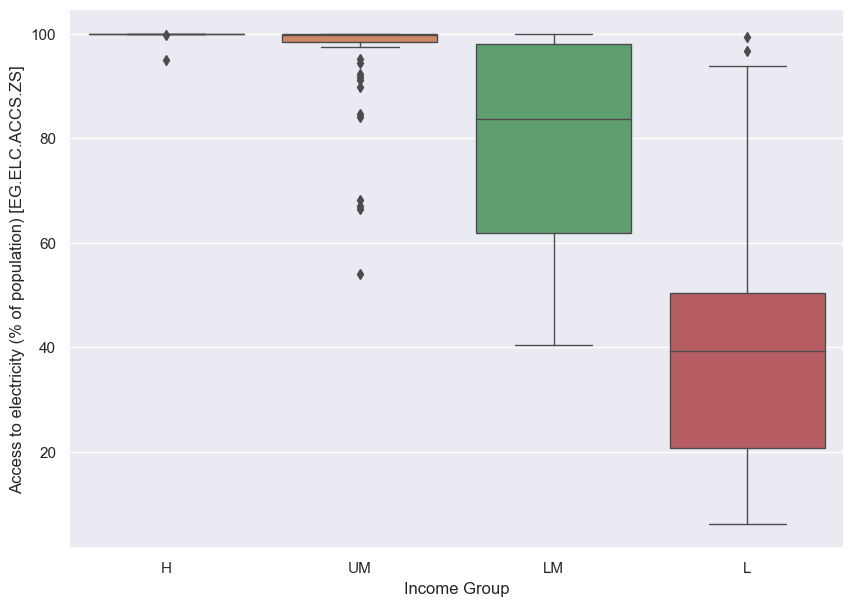

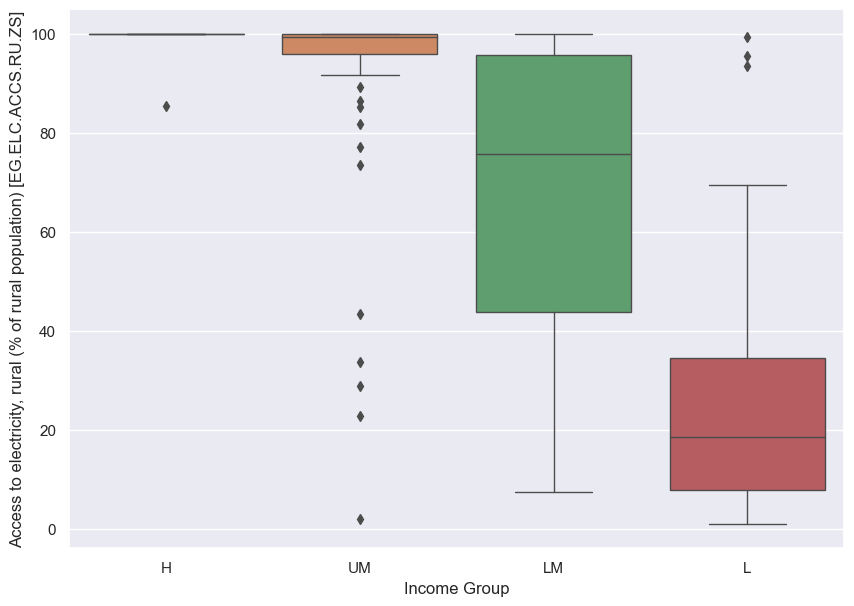

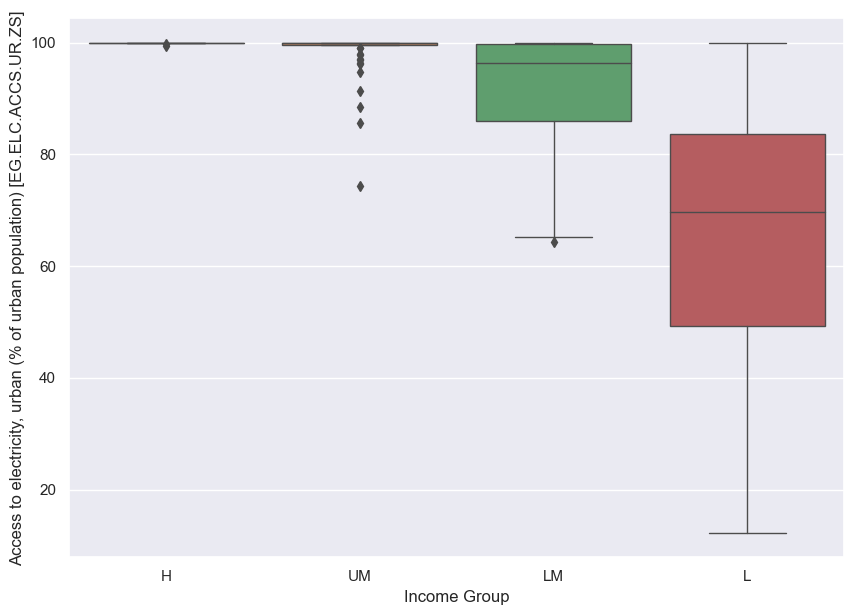

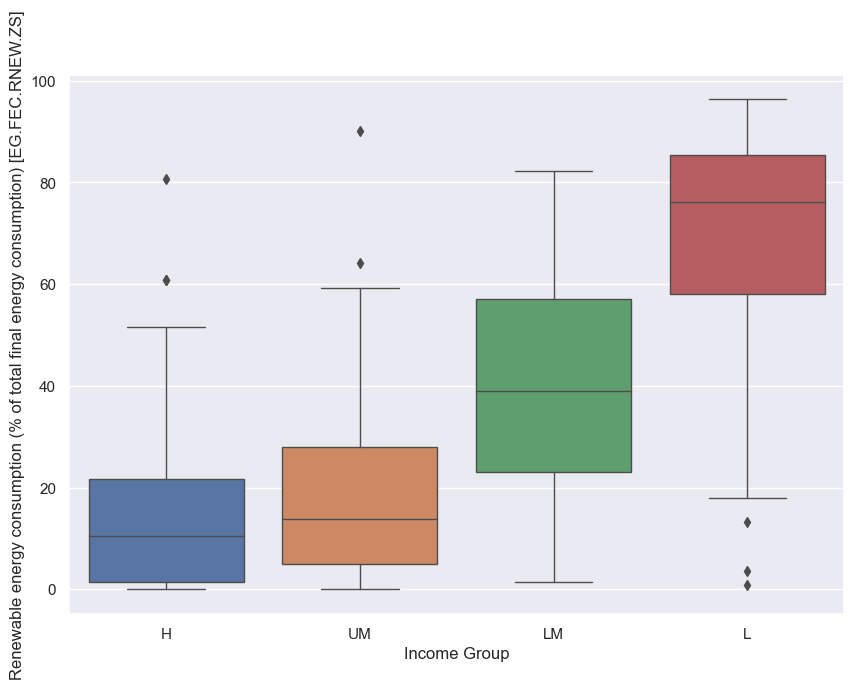

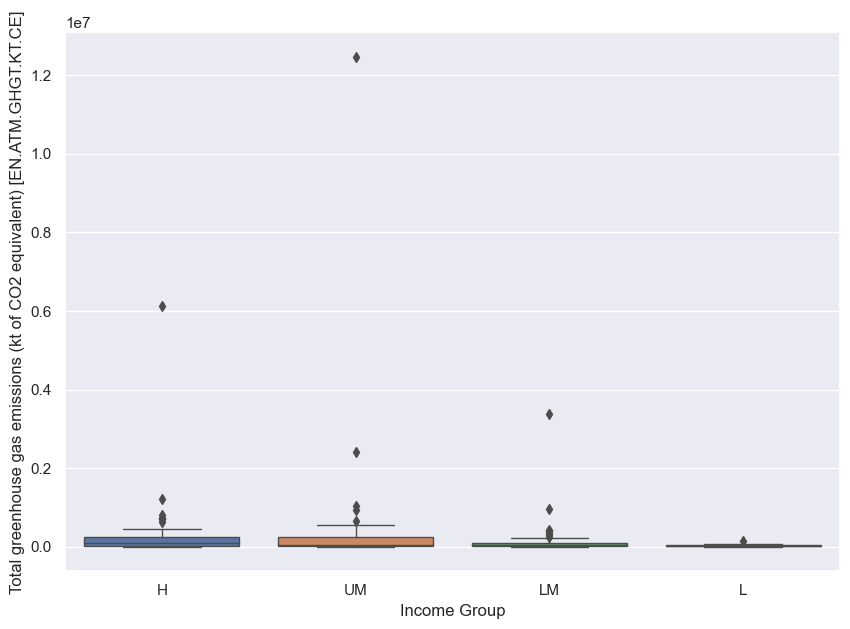

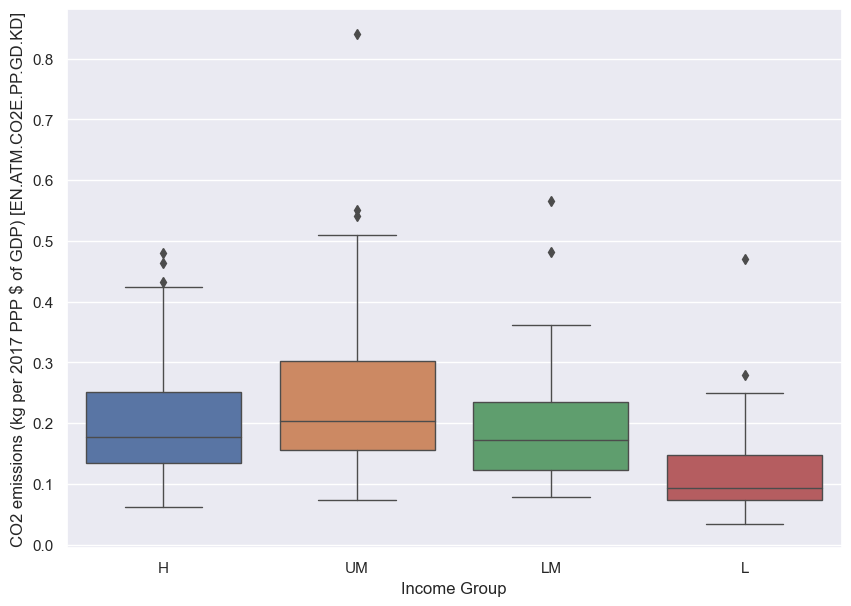

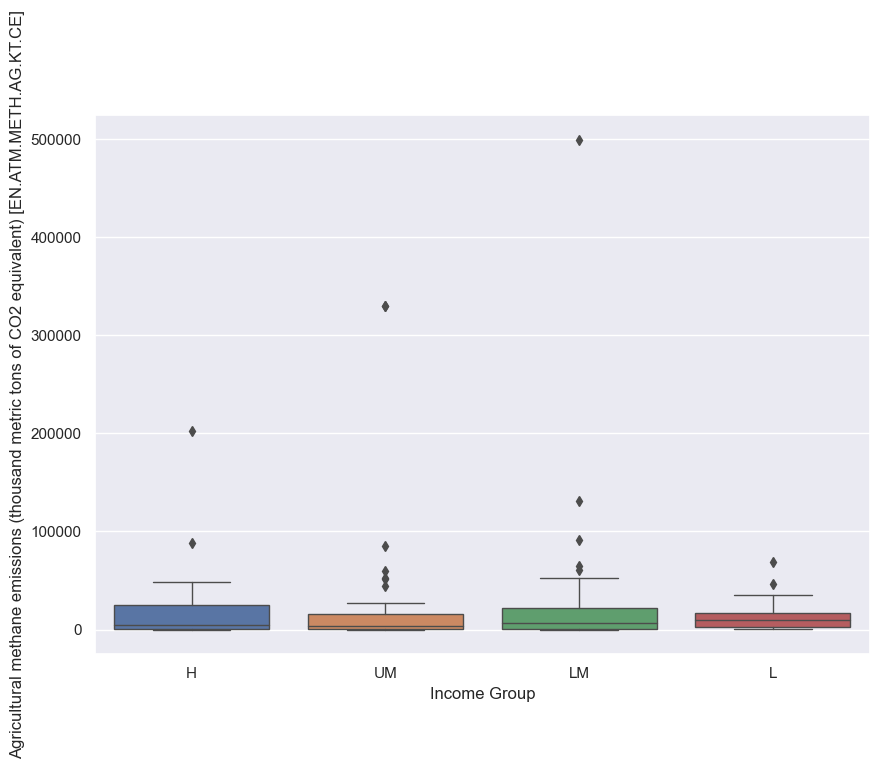

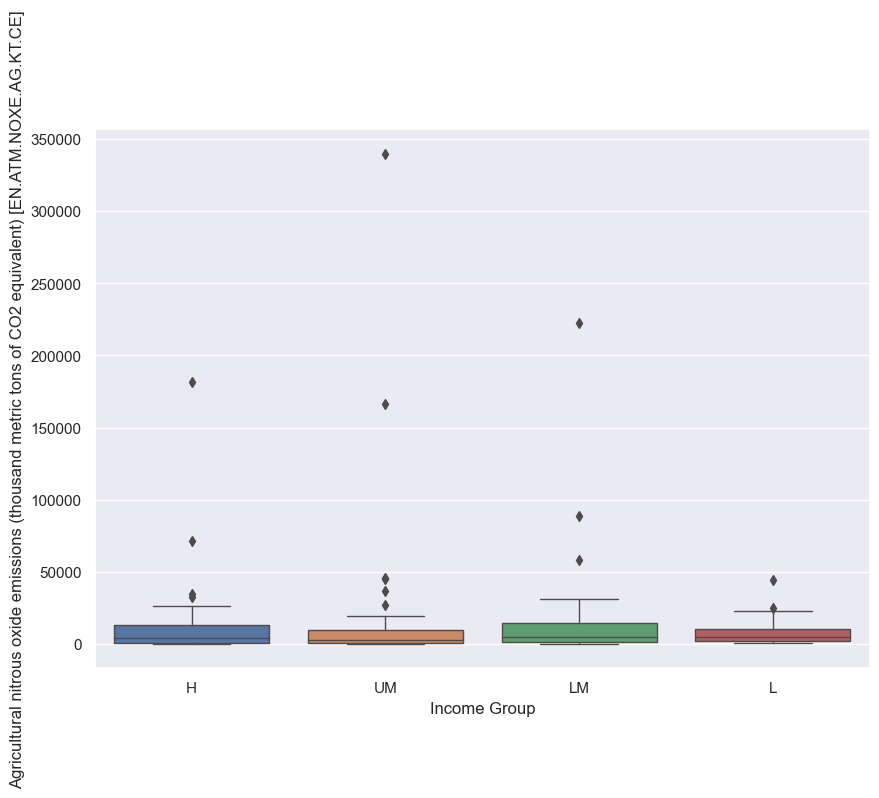

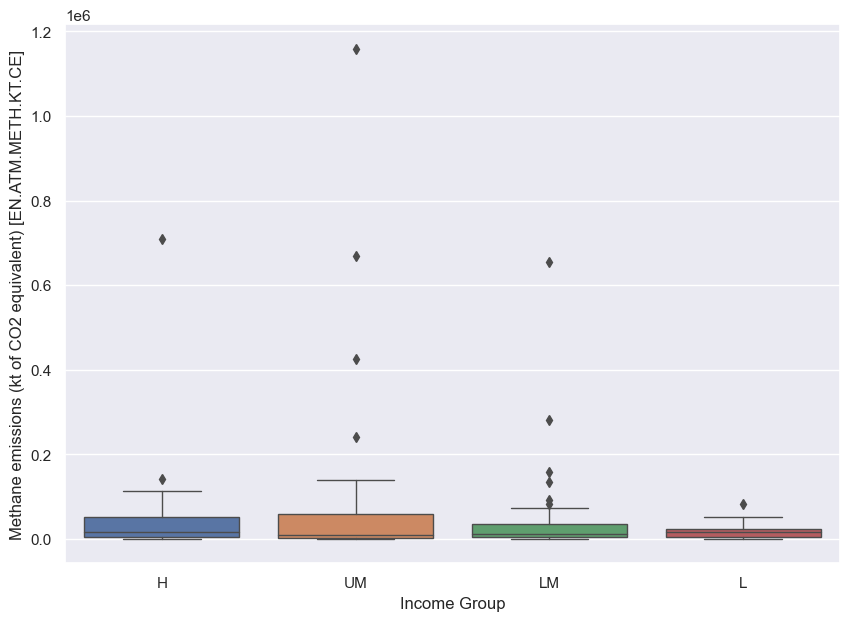

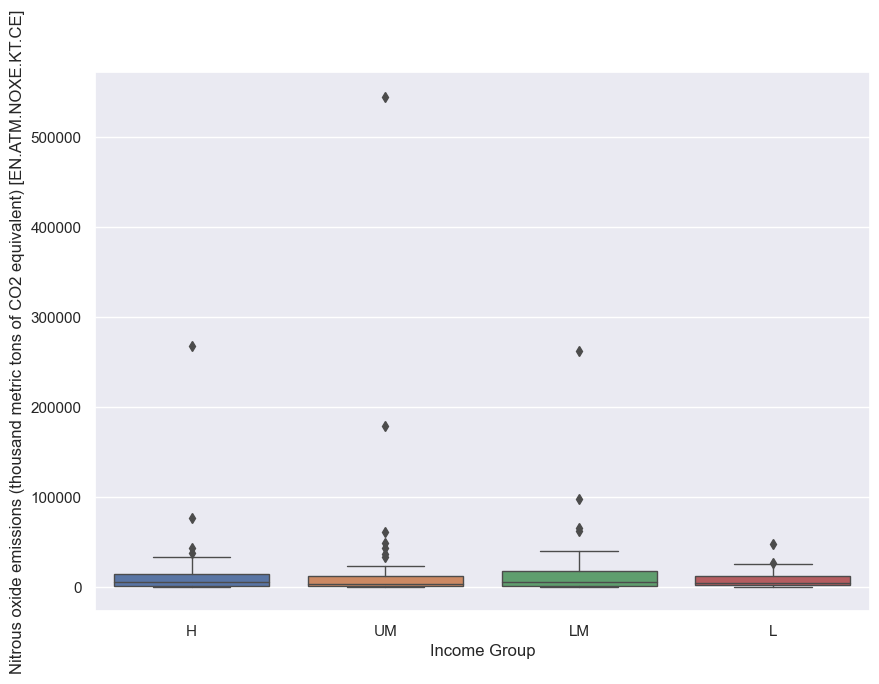

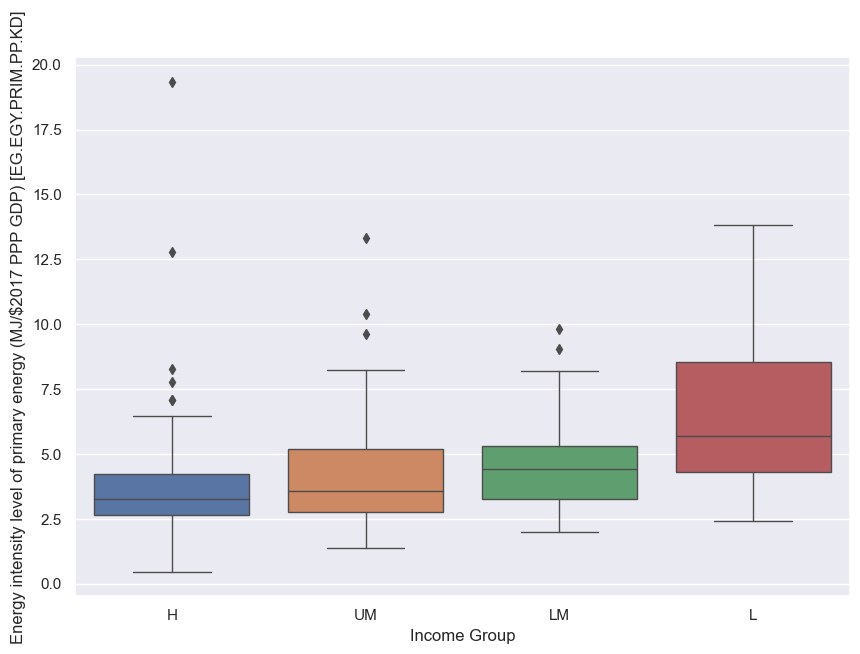

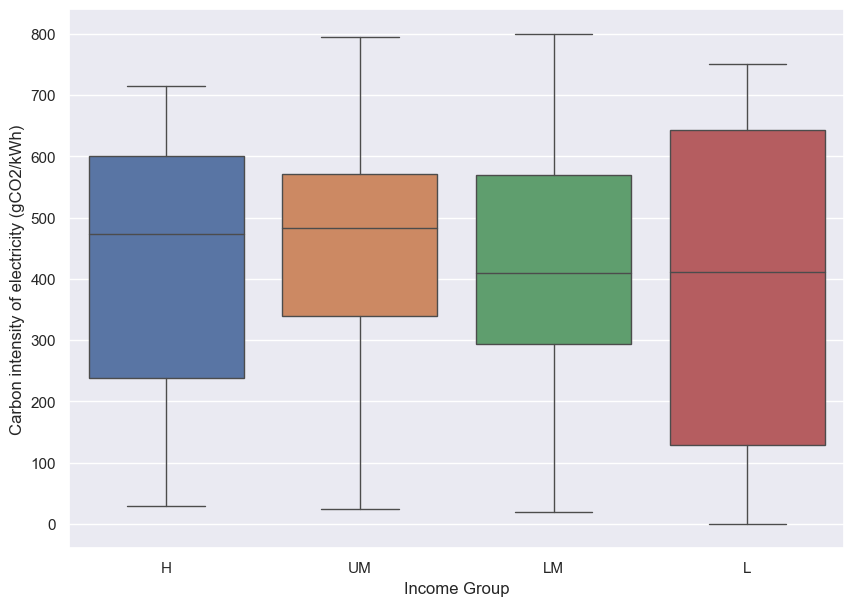

In [56]:
#boxplots for manova
for v in pollution:
    sns.set(rc={"figure.figsize":(10, 7)})
    f, (ax_box) = plt.subplots(1)
    sns.boxplot(x=data['Income Group'] , y=data[v], ax = ax_box, linewidth= 1.0)

In [57]:
# MANOVA

In [58]:
pollution_manova = data[['Income Group'] + pollution]

In [59]:
pollution_manova

,Income Group,Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS],"Access to clean fuels and technologies for cooking, rural (% of rural population) [EG.CFT.ACCS.RU.ZS]","Access to clean fuels and technologies for cooking, urban (% of urban population) [EG.CFT.ACCS.UR.ZS]",Access to electricity (% of population) [EG.ELC.ACCS.ZS],"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]","Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]",Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS],Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE],CO2 emissions (kg per 2017 PPP $ of GDP) [EN.ATM.CO2E.PP.GD.KD],Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE],Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE],Methane emissions (kt of CO2 equivalent) [EN.ATM.METH.KT.CE],Nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.KT.CE],Energy intensity level of primary energy (MJ/$2017 PPP GDP) [EG.EGY.PRIM.PP.KD],Carbon intensity of electricity (gCO2/kWh)
0,L,30.900,13.8500,81.600,96.616135,95.586174,99.626022,17.96,27690.000534,0.080291,10540.0,4310.0,15909.999847,4690.0,2.4400,136.752140
1,UM,79.800,62.5000,92.200,100.000000,100.000000,100.000000,38.11,9449.999809,0.133868,2010.0,960.0,3009.999990,1080.0,2.5700,24.561401
2,UM,99.600,98.7000,100.000,99.697838,99.071304,99.933952,0.19,278029.998779,0.336716,6820.0,5530.0,94400.001526,12510.0,5.1900,488.975200
3,UM,81.168,59.2630,93.575,84.048066,73.536247,94.733865,0.49,243760.104065,0.550819,23820.4,13235.3,79695.899973,14129.8,9.6246,687.500000
4,LM,49.100,8.1000,77.700,45.290001,7.333445,65.269997,57.36,75239.997864,0.111381,16220.0,16140.0,34000.000000,16840.0,2.9500,137.850460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,H,55.394,32.2690,78.416,100.000000,100.000000,100.000000,3.43,226545.302620,0.161743,33739.7,22010.8,52611.999569,25127.6,2.3288,688.524540
196,LM,45.157,18.7335,70.111,100.000000,100.000000,100.000000,12.73,40982.100382,0.177872,23361.5,12688.5,26220.099993,13449.0,2.5500,524.999940
197,L,61.500,42.9000,93.700,62.000000,37.545254,87.139853,3.60,23860.000610,0.248813,4360.0,2980.0,10619.999886,3080.0,3.7545,542.424260
198,LM,11.900,2.1000,24.600,40.317890,12.466436,76.461876,82.28,37560.001373,0.126504,10330.0,13510.0,15250.000000,13990.0,7.3500,130.192200


In [60]:
pollution_manova.rename(columns={
    
    'Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]' : 're_energy_con',
    'CO2 emissions (kg per 2017 PPP $ of GDP) [EN.ATM.CO2E.PP.GD.KD]' : 'CO2_PPP',
    'Access to electricity (% of population) [EG.ELC.ACCS.ZS]' : 'access_elec',
    'Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS]' : 'access_clean_fuel',
    'Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE]' : 'greenhouse',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP) [EG.EGY.PRIM.PP.KD]' : 'energy_intensity',
    'Carbon intensity of electricity (gCO2/kWh)' : 'carbon_intensity',
    'Income Group': 'income_group'
    
    
}, inplace=True)
    

C:\Users\isabe\AppData\Local\Temp\ipykernel_14356\3782605290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pollution_manova.rename(columns={


In [61]:
pollution_manova

,income_group,access_clean_fuel,"Access to clean fuels and technologies for cooking, rural (% of rural population) [EG.CFT.ACCS.RU.ZS]","Access to clean fuels and technologies for cooking, urban (% of urban population) [EG.CFT.ACCS.UR.ZS]",access_elec,"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]","Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]",re_energy_con,greenhouse,CO2_PPP,Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE],Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE],Methane emissions (kt of CO2 equivalent) [EN.ATM.METH.KT.CE],Nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.KT.CE],energy_intensity,carbon_intensity
0,L,30.900,13.8500,81.600,96.616135,95.586174,99.626022,17.96,27690.000534,0.080291,10540.0,4310.0,15909.999847,4690.0,2.4400,136.752140
1,UM,79.800,62.5000,92.200,100.000000,100.000000,100.000000,38.11,9449.999809,0.133868,2010.0,960.0,3009.999990,1080.0,2.5700,24.561401
2,UM,99.600,98.7000,100.000,99.697838,99.071304,99.933952,0.19,278029.998779,0.336716,6820.0,5530.0,94400.001526,12510.0,5.1900,488.975200
3,UM,81.168,59.2630,93.575,84.048066,73.536247,94.733865,0.49,243760.104065,0.550819,23820.4,13235.3,79695.899973,14129.8,9.6246,687.500000
4,LM,49.100,8.1000,77.700,45.290001,7.333445,65.269997,57.36,75239.997864,0.111381,16220.0,16140.0,34000.000000,16840.0,2.9500,137.850460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,H,55.394,32.2690,78.416,100.000000,100.000000,100.000000,3.43,226545.302620,0.161743,33739.7,22010.8,52611.999569,25127.6,2.3288,688.524540
196,LM,45.157,18.7335,70.111,100.000000,100.000000,100.000000,12.73,40982.100382,0.177872,23361.5,12688.5,26220.099993,13449.0,2.5500,524.999940
197,L,61.500,42.9000,93.700,62.000000,37.545254,87.139853,3.60,23860.000610,0.248813,4360.0,2980.0,10619.999886,3080.0,3.7545,542.424260
198,LM,11.900,2.1000,24.600,40.317890,12.466436,76.461876,82.28,37560.001373,0.126504,10330.0,13510.0,15250.000000,13990.0,7.3500,130.192200


In [62]:
# test for normality

In [63]:
import math
from scipy.stats import shapiro 
from pingouin import multivariate_normality
from statsmodels.multivariate.manova import MANOVA

In [64]:
# pollution = list of variables about pollution
list_variables = pollution

In [65]:
# NORMALITY ASSSUMPTION NEVER RESPECTED

for e in list_variables:
    print(e)
    
    shapiro_test = stats.shapiro(data[e])
    
    print(shapiro_test)
    
    # if p value < 0.05 REJECT NULL HP, ie normality
    
    if shapiro_test.pvalue < 0.05:
        print('no normality')
    else:    
        print('normality')    
    
    
    print('------------------------------------------')

Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS]
ShapiroResult(statistic=0.8236562013626099, pvalue=2.6666355619963875e-14)
no normality
------------------------------------------
Access to clean fuels and technologies for cooking, rural (% of rural population) [EG.CFT.ACCS.RU.ZS]
ShapiroResult(statistic=0.813772439956665, pvalue=1.0130027852249708e-14)
no normality
------------------------------------------
Access to clean fuels and technologies for cooking, urban (% of urban population) [EG.CFT.ACCS.UR.ZS]
ShapiroResult(statistic=0.7524199485778809, pvalue=5.026117484972667e-17)
no normality
------------------------------------------
Access to electricity (% of population) [EG.ELC.ACCS.ZS]
ShapiroResult(statistic=0.6656860113143921, pvalue=1.1787856226399975e-19)
no normality
------------------------------------------
Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]
ShapiroResult(statistic=0.6797133684158325, pvalue=2.87928

In [66]:
multivariate_normality(data[pollution], alpha = 0.05)

HZResults(hz=5.405729263752025, pval=0.0, normal=False)

In [67]:
# MANOVA 

In [68]:
# MITIGATION POLICIES on 'income_group'
# take as proxy:
# - access to clean fuels and tech for cooking 'access_clean_fuel'
# - access to electricity 'access_elec'

model = MANOVA.from_formula('access_clean_fuel + access_elec ~ income_group', data = pollution_manova)
print(model.mv_test()) 

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0605 2.0000 195.0000 1513.1131 0.0000
         Pillai's trace  0.9395 2.0000 195.0000 1513.1131 0.0000
 Hotelling-Lawley trace 15.5191 2.0000 195.0000 1513.1131 0.0000
    Roy's greatest root 15.5191 2.0000 195.0000 1513.1131 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        income_group      Value  Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
            Wilks' lambda 0.2899 6.0000 390.0000  55.7319 0.0000
           Pillai's trace 0.7631 6.0000 392.0

In [69]:
# P VALUE < 0.05, REJECT NULL HP MEANS EQUAL IN GROUPS
# high income contries higher levels, cioè implementano megio policies 

In [72]:
# A p-value > 0.05 would be interpreted by many as “not statistically significant,”
# meaning that there was insufficient evidence to reject the null hypothesis 
# and conclude that the groups are different.

In [70]:
# EMISSIONS

In [71]:
model_1 = MANOVA.from_formula('CO2_PPP + greenhouse ~ income_group', data = pollution_manova)
print(model_1.mv_test()) 

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.4926 2.0000 195.0000 100.4141 0.0000
         Pillai's trace 0.5074 2.0000 195.0000 100.4141 0.0000
 Hotelling-Lawley trace 1.0299 2.0000 195.0000 100.4141 0.0000
    Roy's greatest root 1.0299 2.0000 195.0000 100.4141 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
       income_group      Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.8845 6.0000 390.0000  4.1121 0.0005
          Pillai's trace 0.1157 6.0000 392.0000  4.0104 0.0007
  Hotelling

In [73]:
# p-value still lower than 0.05, reject null hp means are the same
# higher per richer countries in general
# this is because of the presence in the Kaya identity of GDP and population

In [74]:
# terms that can lead to decoupling in the Kaya identity

In [75]:
model_2 = MANOVA.from_formula('energy_intensity + carbon_intensity ~ income_group', data = pollution_manova)
print(model_2.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.3124 2.0000 195.0000 214.6064 0.0000
         Pillai's trace 0.6876 2.0000 195.0000 214.6064 0.0000
 Hotelling-Lawley trace 2.2011 2.0000 195.0000 214.6064 0.0000
    Roy's greatest root 2.2011 2.0000 195.0000 214.6064 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
       income_group      Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.8676 6.0000 390.0000  4.7850 0.0001
          Pillai's trace 0.1328 6.0000 392.0000  4.6475 0.0001
  Hotelling

In [76]:
# still the groups are different!